In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [3]:
df_index = pd.read_csv('economic_ind.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,umemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
## drop unnecessary column
df_index.drop(columns=['Unnamed: 0','month','year'],axis=1,inplace=True)

In [7]:
## check any null value present
df_index.isnull().sum()

interest_rate        0
umemployment_rate    0
index_price          0
dtype: int64

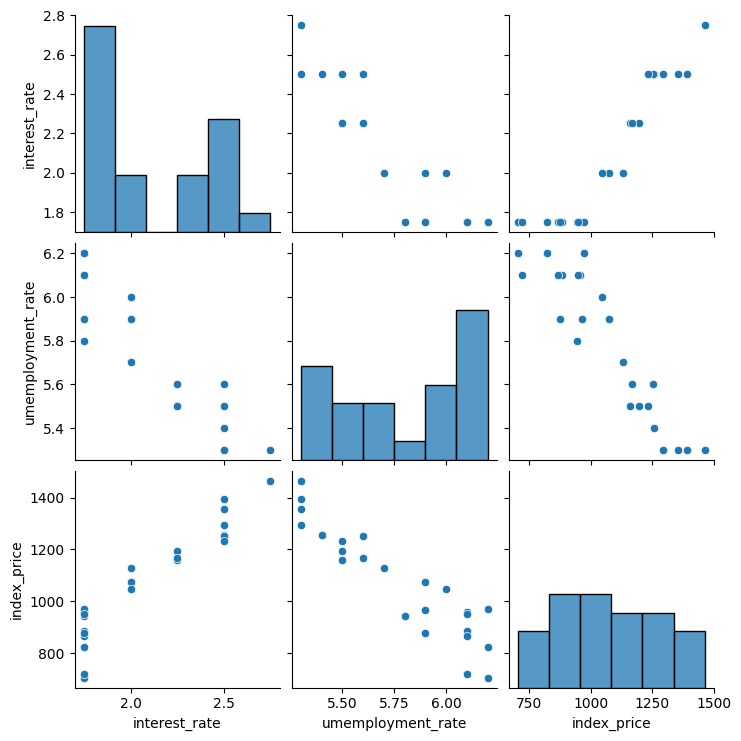

In [9]:
## visualization using seaborn
import seaborn as sns
sns.pairplot(df_index)



In [10]:
df_index.corr()

,interest_rate,umemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
umemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

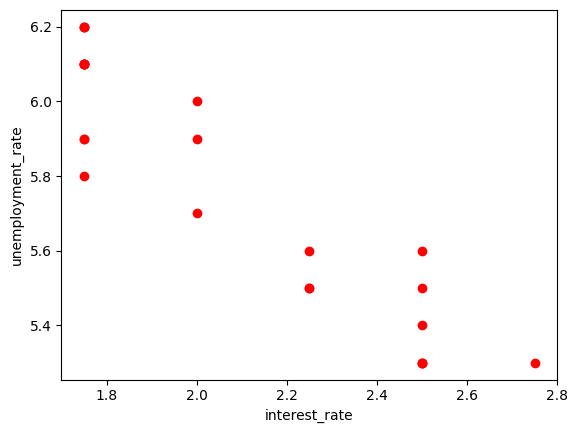

In [13]:
plt.scatter(df_index['interest_rate'],df_index['umemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [15]:
## dependent and intependent features
X = df_index[['interest_rate','umemployment_rate']]
Y = df_index[['index_price']]

In [16]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [18]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='umemployment_rate'>

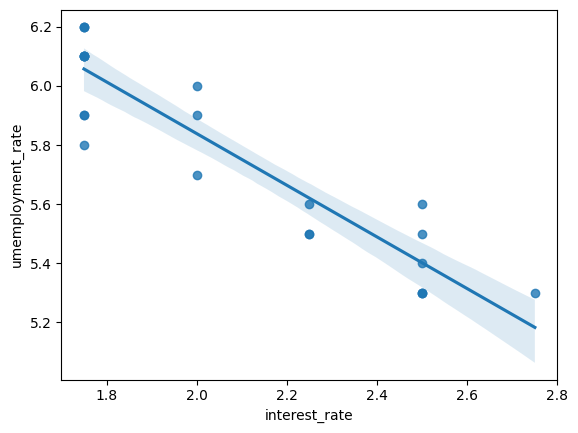

In [21]:
sns.regplot(x='interest_rate', y='umemployment_rate', data=df_index)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [24]:
X_test = scaler.fit_transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [27]:
regression.fit(X_train,Y_train)

LinearRegression()

In [28]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [30]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [31]:
## predictions
y_pred = regression.predict(X_test)


In [32]:
y_pred

array([[1180.7466813 ],
       [ 802.74279699],
       [1379.83457045],
       [ 838.52599602],
       [ 973.85313963],
       [1144.96348227]])

In [33]:
## performance matrices
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse= mean_squared_error(Y_test,y_pred)
mae= mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [34]:
## R^2
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)
print(score)

0.7591371539010257


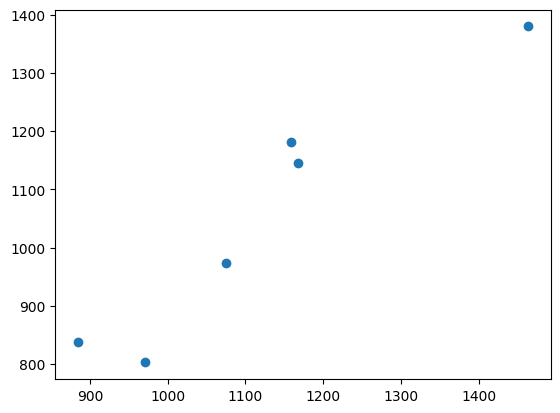

In [35]:
## assumptions
plt.scatter(Y_test,y_pred)

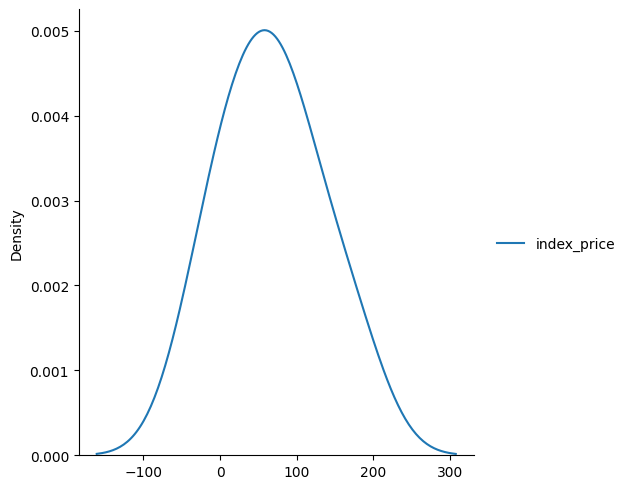

In [36]:
## residual
residual = Y_test-y_pred
sns.displot(residual,kind='kde')

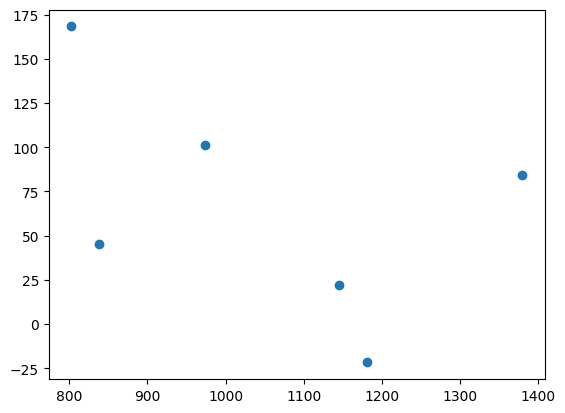

In [37]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residual)

In [38]:
## OLS linear regression
import statsmodels.api as sm

In [39]:
model = sm.OLS(Y_train,X_train).fit()

In [40]:
prediction = model.predict(X_test)
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [41]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 27 Oct 2024   Prob (F-statistic):                       0.754
Time:                        19:59:40   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\StartingML\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [43]:
regression.coef_

array([[  88.27275507, -116.25716066]])